<!-- dom:TITLE: Calculating the diffusive heat flow coefficient using OSHUN and comparison to theory  -->
# Calculating the diffusive heat flow coefficient using OSHUN and comparison to theory
<!-- dom:AUTHOR: Archis Joglekar Email:archis@ucla.edu at Particle-in-Cell and Kinetic Simulation Center, University of California - Los Angeles. -->
<!-- Author: --> **Archis Joglekar** (email: `archis@ucla.edu`), Particle-in-Cell and Kinetic Simulation Center, University of California - Los Angeles.

Date: **March, 2017**

This writeup illustrates some of the methodology and simulations that were performed to test the coupling of the Vlasov equations along with Fokker-Planck module in magnetized and unmagnetized plasmas.


The inputdeck is provided in {OSHUN_ROOT}/input/examples

# Initial Conditions
<div id="Initial Conditions"></div>

$dt = 1.0$

$n_0 = 10^{21} / cm^3$

$Z_0 = [1,10,20,40,79]$

$\omega\tau = [0.23, 0.4, 1.44, 2.34]$

### and the following temperature profile

In [3]:
from IPython.display import display
import sys
sys.path.append('./python_scripts')

import numpy as np
from numpy import ma

from matplotlib import pyplot as plt
from matplotlib import colors, ticker, cm

import h5py
import oshunroutines as oshun
import heatflowroutines as heatflow
import re
np.set_printoptions(precision=6)

In [4]:
#########################################################################
## Base directory for all data -- This is where you would set your own ##
#########################################################################
basedirectory = '/Users/archis/Dropbox/work/dev/oshun/oshun-OS/OSHUN/1d_cpp/localbuild/'

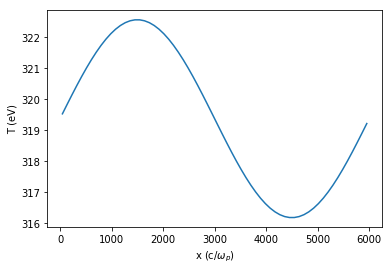

In [6]:
#########################################################################
fulldir = basedirectory + '/yourfolderforrun1'
#########################################################################


simtime,axis1,axis2,dataT = oshun.pullData(fulldir,'T',0)
dataT = np.array(dataT)*511000
plt.plot(axis1,dataT)
plt.xlabel('x (c/$\omega_p$)')
plt.ylabel('T (eV)')
plt.show()

### which gives you the following heat flow profile for Z = 1

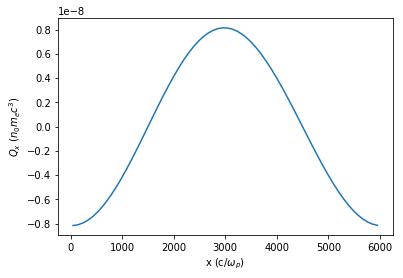

In [16]:
simtime,axis1,axis2,dataQx = oshun.pullData(fulldir,'Qx',100)
dataQx = np.array(dataQx)

plt.plot(axis1,dataQx)
plt.xlabel('x (c/$\omega_p$)')
plt.ylabel('$Q_x$ ($n_0 m_e c^3$)')
plt.show()

# Calculating Kappa 
<div id="Calculating Kappa"></div>

Calculating $\kappa_\perp$ requires some manipulation of the normalization. 

$q_x = \kappa_\perp \nabla T$

### $\tilde q_x = \frac{\tilde{n} \tilde{T} \tau_{ei}}{m_e} ~~ \kappa_\perp^c \tilde{\nabla} \tilde{T}$

where

### $\tau_{ei} = \sqrt{\frac{2}{\pi}}$ Ln$(\Lambda)~/~9 N_{Debye}$

$N_{Debye} = 1.72 \times 10^9 \sqrt{T_{eV}~ /~ n_{/cc}}$

<br><br> 

The Log Lambdas are calculated using the formula from NRL:

if $T_{eV} > 10 Z_0^2$, 

Ln$(\Lambda)$ = max($2.0,24.0 - 0.5~ln(n_{/cc}) + ln(T_{eV})$)

else 

Ln$(\Lambda)$ = max($2.0,23.0 - 0.5~ln(n_{/cc}) + 1.5~ln(T_{eV}) - ln(Z)$)

## Calculating for Z = 1

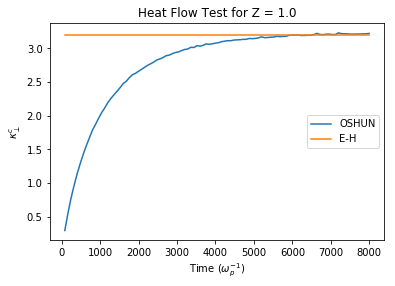

1 - kappa_{sim}/kappa_{EH} = -0.00598897226357


In [15]:
#####################################
############ Processing #############
#####################################
## Set directory
tmax = 100
fulldir = basedirectory + '/Z1-wt0'
# fulldir = basedirectory + '/Z1-b0'

## Get information for plot from inputdeck
inputdeck = open(fulldir + '/inputdeck', 'r') 
for line in inputdeck: 
    if 'hydrocharge' in line:
        Z0 = re.findall("\d+\.\d+", line)
        Z0 = float(Z0[0])
        
### Get kappa
timerange = np.linspace(1,tmax,num=tmax)
timeaxis, xaxis, maxKvstime, Kofxandt = heatflow.getcompoundxt(fulldir,'kappa',timerange)   
timeaxis, xaxis, maxKEHvstime, KEHofxandt = heatflow.getcompoundxt(fulldir,'kappaEH',timerange)   

##########
## Plot ##
##########
plt.plot(timeaxis,maxKvstime,label='OSHUN')
plt.plot(timeaxis,maxKEHvstime,label='E-H')
plt.xlabel('Time ($\omega_p^{-1}$)')
plt.ylabel('$\kappa_\perp^c$')
plt.title('Heat Flow Test for Z = ' + str(Z0))
plt.legend(loc='center right')
plt.show()

print '1 - kappa_{sim}/kappa_{EH} = ' + str(1-abs(maxKvstime[tmax-1]/maxKEHvstime[tmax-1]))

## For Z = 1, OSHUN calculates $\kappa$ to within 0.6 %

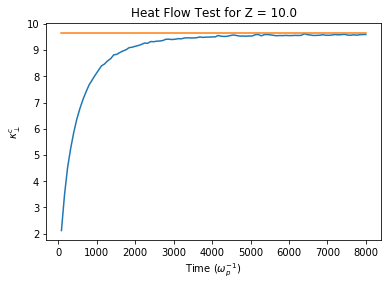

1 - kappa_{sim}/kappa_{EH} = 0.00662475356742


In [73]:
#####################################
############ Processing #############
#####################################
## Set directory
tmax = 100
fulldir = basedirectory + '/Z10-wt0'

## Get information for plot from inputdeck
inputdeck = open(fulldir + '/inputdeck', 'r') 
for line in inputdeck: 
    if 'hydrocharge' in line:
        Z0 = re.findall("\d+\.\d+", line)
        Z0 = float(Z0[0])
        
### Get kappa
timerange = np.linspace(1,tmax,num=tmax)
timeaxis, xaxis, maxKvstime, Kofxandt = heatflow.getcompoundxt(fulldir,'kappa',timerange)   
timeaxis, xaxis, maxKEHvstime, KEHofxandt = heatflow.getcompoundxt(fulldir,'kappaEH',timerange)   

##########
## Plot ##
##########
plt.plot(timeaxis,maxKvstime,timeaxis,maxKEHvstime)
plt.xlabel('Time ($\omega_p^{-1}$)')
plt.ylabel('$\kappa_\perp^c$')
plt.title('Heat Flow Test for Z = ' + str(Z0))
plt.show()
print '1 - kappa_{sim}/kappa_{EH} = ' + str(1-abs(maxKvstime[tmax-1]/maxKEHvstime[tmax-1]))

## Similarly for Z = 10, OSHUN calculates $\kappa$ to within 0.6 %

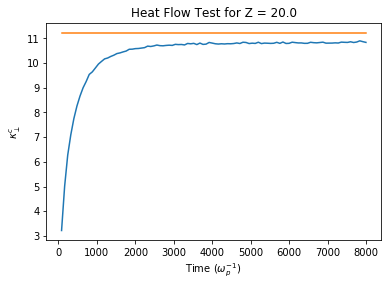

1 - kappa_{sim}/kappa_{EH} = 0.0344592439531


In [39]:
#####################################
############ Processing #############
#####################################
## Set directory
tmax = 100
fulldir = basedirectory + '/Z20-wt0'

## Get information for plot from inputdeck
inputdeck = open(fulldir + '/inputdeck', 'r') 
for line in inputdeck: 
    if 'hydrocharge' in line:
        Z0 = re.findall("\d+\.\d+", line)
        Z0 = float(Z0[0])
        
### Get kappa
timerange = np.linspace(1,tmax,num=tmax)
timeaxis, xaxis, maxKvstime, Kofxandt = heatflow.getcompoundxt(fulldir,'kappa',timerange)   
timeaxis, xaxis, maxKEHvstime, KEHofxandt = heatflow.getcompoundxt(fulldir,'kappaEH',timerange)   

##########
## Plot ##
##########
plt.plot(timeaxis,maxKvstime,timeaxis,maxKEHvstime)
plt.xlabel('Time ($\omega_p^{-1}$)')
plt.ylabel('$\kappa_\perp^c$')
plt.title('Heat Flow Test for Z = ' + str(Z0))
plt.show()
print '1 - kappa_{sim}/kappa_{EH} = ' + str(1-abs(maxKvstime[tmax-1]/maxKEHvstime[tmax-1]))

## Similarly for Z = 20, OSHUN calculates $\kappa$ to within 3 %. This is without the use of the full electron-electron collisoin operator

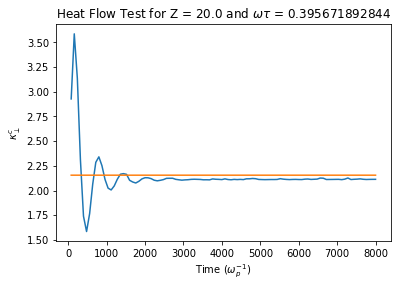

1 - kappa_{sim}/kappa_{EH} = 0.0194450208553


In [40]:
#####################################
############ Processing #############
#####################################
## Set directory
tmax = 100
fulldir = basedirectory + '/Z20-b1em2'

## Get information for plot from inputdeck
inputdeck = open(fulldir + '/inputdeck', 'r') 
for line in inputdeck: 
    if 'hydrocharge' in line:
        Z0 = re.findall("\d+\.\d+", line)
        Z0 = float(Z0[0])
        
### Get kappa
timerange = np.linspace(1,tmax,num=tmax)
timeaxis, xaxis, maxKvstime, Kofxandt = heatflow.getcompoundxt(fulldir,'kappa',timerange)   
timeaxis, xaxis, maxKEHvstime, KEHofxandt = heatflow.getcompoundxt(fulldir,'kappaEH',timerange)   
timeaxis, xaxis, maxwtvstime, wtofxandt = heatflow.getcompoundxt(fulldir,'wt',timerange)   

##########
## Plot ##
##########
plt.plot(timeaxis,maxKvstime,timeaxis,maxKEHvstime)
plt.xlabel('Time ($\omega_p^{-1}$)')
plt.ylabel('$\kappa_\perp^c$')
plt.title('Heat Flow Test for Z = ' + str(Z0) + r' and $\omega\tau$ = ' + str(np.max(maxwtvstime)))
plt.show()
print '1 - kappa_{sim}/kappa_{EH} = ' + str(1-abs(maxKvstime[tmax-1]/maxKEHvstime[tmax-1]))

## Kappa for Z = 20, wt = 0.4 is within 2%

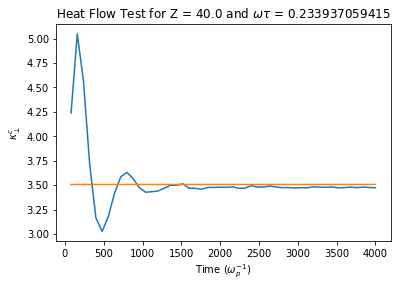

1 - kappa_{sim}/kappa_{EH} = 0.00958116477339


In [41]:
#####################################
############ Processing #############
#####################################
## Set directory
tmax = 50
fulldir = basedirectory + '/Z20-b1em2-flma'

## Get information for plot from inputdeck
inputdeck = open(fulldir + '/inputdeck', 'r') 
for line in inputdeck: 
    if 'hydrocharge' in line:
        Z0 = re.findall("\d+\.\d+", line)
        Z0 = float(Z0[0])
        
### Get kappa
timerange = np.linspace(1,tmax,num=tmax)
timeaxis, xaxis, maxKvstime, Kofxandt = heatflow.getcompoundxt(fulldir,'kappa',timerange)   
timeaxis, xaxis, maxKEHvstime, KEHofxandt = heatflow.getcompoundxt(fulldir,'kappaEH',timerange)   
timeaxis, xaxis, maxwtvstime, wtofxandt = heatflow.getcompoundxt(fulldir,'wt',timerange)   

##########
## Plot ##
##########
plt.plot(timeaxis,maxKvstime,timeaxis,maxKEHvstime)
plt.xlabel('Time ($\omega_p^{-1}$)')
plt.ylabel('$\kappa_\perp^c$')
plt.title('Heat Flow Test for Z = ' + str(Z0) + r' and $\omega\tau$ = ' + str(np.max(maxwtvstime)))
plt.show()
print '1 - kappa_{sim}/kappa_{EH} = ' + str(1-abs(maxKvstime[tmax-1]/maxKEHvstime[tmax-1]))

## Similarly, Kappa for Z = 40, wt = 0.23 is within 1%

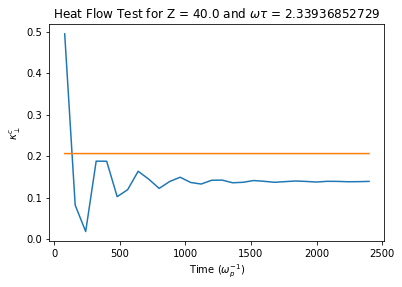

1 - kappa_{sim}/kappa_{EH} = 0.325345920557


In [42]:
#####################################
############ Processing #############
#####################################
## Set directory
tmax = 30
fulldir = basedirectory + '/Z40-b1em1'

## Get information for plot from inputdeck
inputdeck = open(fulldir + '/inputdeck', 'r') 
for line in inputdeck: 
    if 'hydrocharge' in line:
        Z0 = re.findall("\d+\.\d+", line)
        Z0 = float(Z0[0])
        
### Get kappa
timerange = np.linspace(1,tmax,num=tmax)
timeaxis, xaxis, maxKvstime, Kofxandt = heatflow.getcompoundxt(fulldir,'kappa',timerange)   
timeaxis, xaxis, maxKEHvstime, KEHofxandt = heatflow.getcompoundxt(fulldir,'kappaEH',timerange)   
timeaxis, xaxis, maxwtvstime, wtofxandt = heatflow.getcompoundxt(fulldir,'wt',timerange)   

##########
## Plot ##
##########
plt.plot(timeaxis,maxKvstime,timeaxis,maxKEHvstime)
plt.xlabel('Time ($\omega_p^{-1}$)')
plt.ylabel('$\kappa_\perp^c$')
plt.title('Heat Flow Test for Z = ' + str(Z0) + r' and $\omega\tau$ = ' + str(np.max(maxwtvstime)))
plt.show()
print '1 - kappa_{sim}/kappa_{EH} = ' + str(1-abs(maxKvstime[tmax-1]/maxKEHvstime[tmax-1]))

## Kappa for Z = 40, wt = 2.34 is not calculated well, only to within 30%

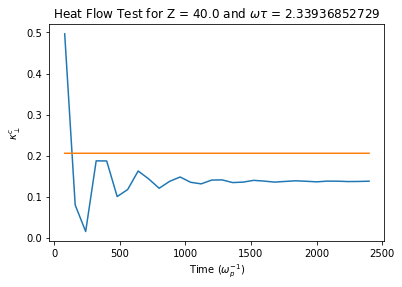

1 - kappa_{sim}/kappa_{EH} = 0.328952669463


In [43]:
#####################################
############ Processing #############
#####################################
## Set directory
tmax = 30
fulldir = basedirectory + '/Z40-b1em1-flma'

## Get information for plot from inputdeck
inputdeck = open(fulldir + '/inputdeck', 'r') 
for line in inputdeck: 
    if 'hydrocharge' in line:
        Z0 = re.findall("\d+\.\d+", line)
        Z0 = float(Z0[0])
        
### Get kappa
timerange = np.linspace(1,tmax,num=tmax)
timeaxis, xaxis, maxKvstime, Kofxandt = heatflow.getcompoundxt(fulldir,'kappa',timerange)   
timeaxis, xaxis, maxKEHvstime, KEHofxandt = heatflow.getcompoundxt(fulldir,'kappaEH',timerange)   
timeaxis, xaxis, maxwtvstime, wtofxandt = heatflow.getcompoundxt(fulldir,'wt',timerange)   

##########
## Plot ##
##########
plt.plot(timeaxis,maxKvstime,timeaxis,maxKEHvstime)
plt.xlabel('Time ($\omega_p^{-1}$)')
plt.ylabel('$\kappa_\perp^c$')
plt.title('Heat Flow Test for Z = ' + str(Z0) + r' and $\omega\tau$ = ' + str(np.max(maxwtvstime)))
plt.show()
print '1 - kappa_{sim}/kappa_{EH} = ' + str(1-abs(maxKvstime[tmax-1]/maxKEHvstime[tmax-1]))

## Kappa for Z = 40, wt = 2.34 is still 30% even with full e-e collision operator

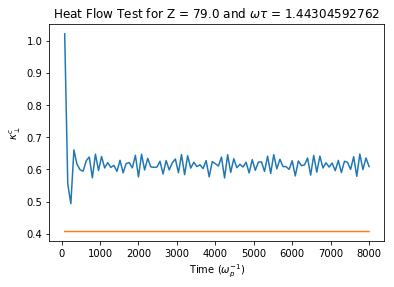

1 - kappa_{sim}/kappa_{EH} = -0.498705978792


In [44]:
#####################################
############ Processing #############
#####################################
## Set directory
tmax = 100
fulldir = basedirectory + '/Z79-b1em1'

## Get information for plot from inputdeck
inputdeck = open(fulldir + '/inputdeck', 'r') 
for line in inputdeck: 
    if 'hydrocharge' in line:
        Z0 = re.findall("\d+\.\d+", line)
        Z0 = float(Z0[0])
        
### Get kappa, Epperlein Haines Kappa, and the magnetization
timerange = np.linspace(1,tmax,num=tmax)
timeaxis, xaxis, maxKvstime, Kofxandt = heatflow.getcompoundxt(fulldir,'kappa',timerange)   
timeaxis, xaxis, maxKEHvstime, KEHofxandt = heatflow.getcompoundxt(fulldir,'kappaEH',timerange)   
timeaxis, xaxis, maxwtvstime, wtofxandt = heatflow.getcompoundxt(fulldir,'wt',timerange)   

##########
## Plot ##
##########
plt.plot(timeaxis,maxKvstime,timeaxis,maxKEHvstime)
plt.xlabel('Time ($\omega_p^{-1}$)')
plt.ylabel('$\kappa_\perp^c$')
plt.title('Heat Flow Test for Z = ' + str(Z0) + r' and $\omega\tau$ = ' + str(np.max(maxwtvstime)))
plt.show()
print '1 - kappa_{sim}/kappa_{EH} = ' + str(1-abs(maxKvstime[tmax-1]/maxKEHvstime[tmax-1]))

## Similarly for Z=79, wt=1.44. The heat flow coefficient is 50% wrong

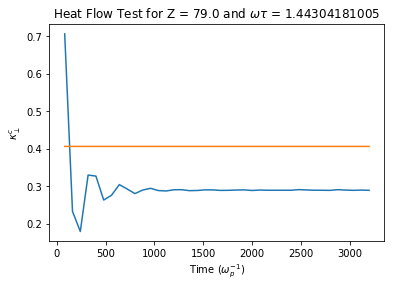

1 - kappa_{sim}/kappa_{EH} = 0.287999114662


In [45]:
#####################################
############ Processing #############
#####################################
## Set directory
tmax = 40
fulldir = basedirectory + '/Z79-1em1-flma'

## Get information for plot from inputdeck
inputdeck = open(fulldir + '/inputdeck', 'r') 
for line in inputdeck: 
    if 'hydrocharge' in line:
        Z0 = re.findall("\d+\.\d+", line)
        Z0 = float(Z0[0])
        
### Get kappa, Epperlein Haines Kappa, and the magnetization
timerange = np.linspace(1,tmax,num=tmax)
timeaxis, xaxis, maxKvstime, Kofxandt = heatflow.getcompoundxt(fulldir,'kappa',timerange)   
timeaxis, xaxis, maxKEHvstime, KEHofxandt = heatflow.getcompoundxt(fulldir,'kappaEH',timerange)   
timeaxis, xaxis, maxwtvstime, wtofxandt = heatflow.getcompoundxt(fulldir,'wt',timerange)   

##########
## Plot ##
##########
plt.plot(timeaxis,maxKvstime,timeaxis,maxKEHvstime)
plt.xlabel('Time ($\omega_p^{-1}$)')
plt.ylabel('$\kappa_\perp^c$')
plt.title('Heat Flow Test for Z = ' + str(Z0) + r' and $\omega\tau$ = ' + str(np.max(maxwtvstime)))
plt.show()
print '1 - kappa_{sim}/kappa_{EH} = ' + str(1-abs(maxKvstime[tmax-1]/maxKEHvstime[tmax-1]))

## Similarly for Z=79, wt=1.44. The heat flow coefficient is 29% wrong with the full e-e collision operator

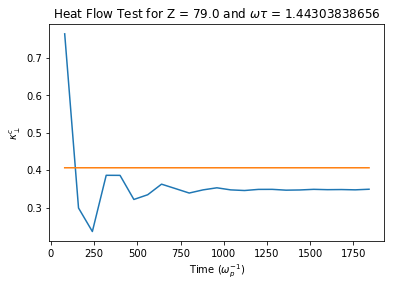

1 - kappa_{sim}/kappa_{EH} = 0.141164755048


In [80]:
#####################################
############ Processing #############
#####################################
## Set directory
tmax = 23
# fulldir = basedirectory + '/Z79-b1em1-expB'
fulldir = basedirectory + '/Z79-b1em1-flma'

## Get information for plot from inputdeck
inputdeck = open(fulldir + '/inputdeck', 'r') 
for line in inputdeck: 
    if 'hydrocharge' in line:
        Z0 = re.findall("\d+\.\d+", line)
        Z0 = float(Z0[0])
        
### Get kappa, Epperlein Haines Kappa, and the magnetization
timerange = np.linspace(1,tmax,num=tmax)
timeaxis, xaxis, maxKvstime, Kofxandt = heatflow.getcompoundxt(fulldir,'kappa',timerange)   
timeaxis, xaxis, maxKEHvstime, KEHofxandt = heatflow.getcompoundxt(fulldir,'kappaEH',timerange)   
timeaxis, xaxis, maxwtvstime, wtofxandt = heatflow.getcompoundxt(fulldir,'wt',timerange)   

##########
## Plot ##
##########
plt.plot(timeaxis,maxKvstime,timeaxis,maxKEHvstime)
plt.xlabel('Time ($\omega_p^{-1}$)')
plt.ylabel('$\kappa_\perp^c$')
plt.title('Heat Flow Test for Z = ' + str(Z0) + r' and $\omega\tau$ = ' + str(np.max(maxwtvstime)))
plt.show()
print '1 - kappa_{sim}/kappa_{EH} = ' + str(1-abs(maxKvstime[tmax-1]/maxKEHvstime[tmax-1]))

## The explicit B field pusher helps significantly, reducing error to 15%

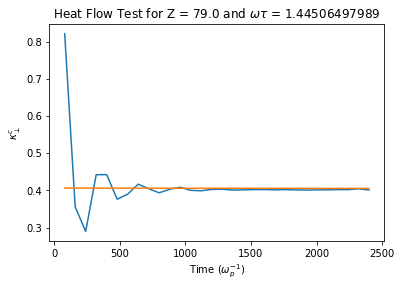

1 - kappa_{sim}/kappa_{EH} = 0.0109998487958


In [76]:
#####################################
############ Processing #############
#####################################
## Set directory
tmax = 30
fulldir = basedirectory + '/Z79-b1em1-dt025-expB'

## Get information for plot from inputdeck
inputdeck = open(fulldir + '/inputdeck', 'r') 
for line in inputdeck: 
    if 'hydrocharge' in line:
        Z0 = re.findall("\d+\.\d+", line)
        Z0 = float(Z0[0])
        
### Get kappa, Epperlein Haines Kappa, and the magnetization
timerange = np.linspace(1,tmax,num=tmax)
timeaxis, xaxis, maxKvstime, Kofxandt = heatflow.getcompoundxt(fulldir,'kappa',timerange)   
timeaxis, xaxis, maxKEHvstime, KEHofxandt = heatflow.getcompoundxt(fulldir,'kappaEH',timerange)   
timeaxis, xaxis, maxwtvstime, wtofxandt = heatflow.getcompoundxt(fulldir,'wt',timerange)   

##########
## Plot ##
##########
plt.plot(timeaxis,maxKvstime,timeaxis,maxKEHvstime)
plt.xlabel('Time ($\omega_p^{-1}$)')
plt.ylabel('$\kappa_\perp^c$')
plt.title('Heat Flow Test for Z = ' + str(Z0) + r' and $\omega\tau$ = ' + str(np.max(maxwtvstime)))
plt.show()
print '1 - kappa_{sim}/kappa_{EH} = ' + str(1-abs(maxKvstime[tmax-1]/maxKEHvstime[tmax-1]))

## Decreasing the time step by a factor of 4, the explicit B field pusher helps significantly, reducing error to less than 1%